In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Analyse exploratoire des données

### 1.a Chargement des données par pandas

In [2]:
data = pd.read_csv("../datas/DataSet_Emails.csv")

### 1.b La structure générale du jeu de données

In [3]:
data.head()

,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


Dans ce jeu de données, on a 8 qui sont des colonnes et 31716 lignes.

- Suppression de colonne inutile

In [5]:
data.drop(columns={'Unnamed: 0', "message_id"}, axis=1, inplace=True)

### 1.c Identification des valeurs manquantes et doublons

In [6]:
data.isnull().sum()

text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

On voit qu'il y'a des valeurs manquantes dans les colonnes text, subject et message

In [7]:
data.duplicated().sum()

np.int64(2627)

On voit la presence de 2627 doublons

### 1.d Analiste de la distribution des variables

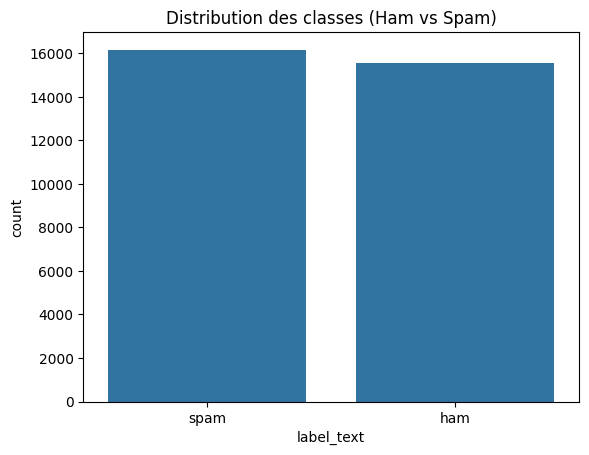

In [8]:
#data[["label"]].hist(figsize=(10, 8), bins=20)
sns.countplot(x="label_text", data=data)
plt.title("Distribution des classes (Ham vs Spam)")
plt.show()


### 1.d Étude des relations entre variables à l’aide de matrices de corrélation

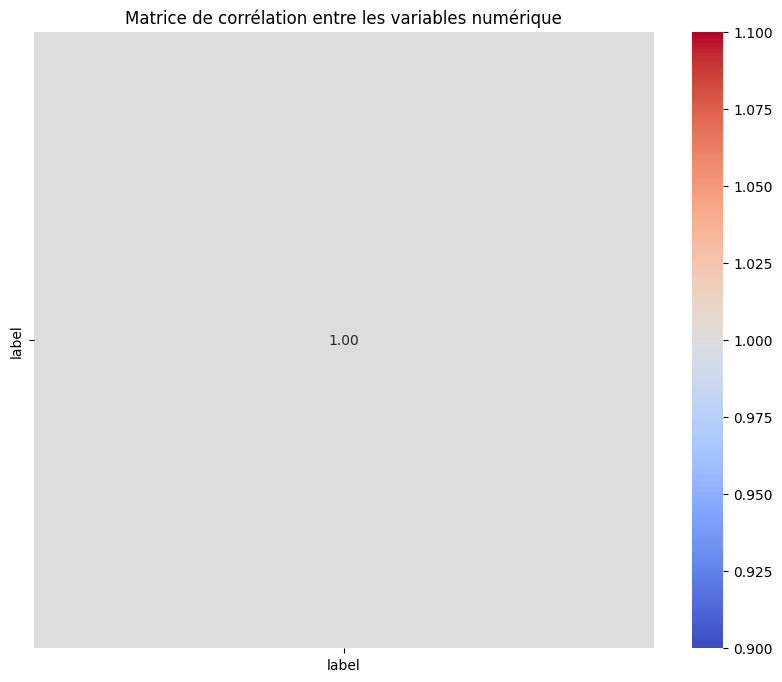

In [9]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les variables numérique")
plt.show()

### 1.c Creation d'un nuage pour les mots frequents dans les spams et un autre pour les emails légitimes

In [10]:
pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Longueur spam_text et ham_text: 21255214 26576448


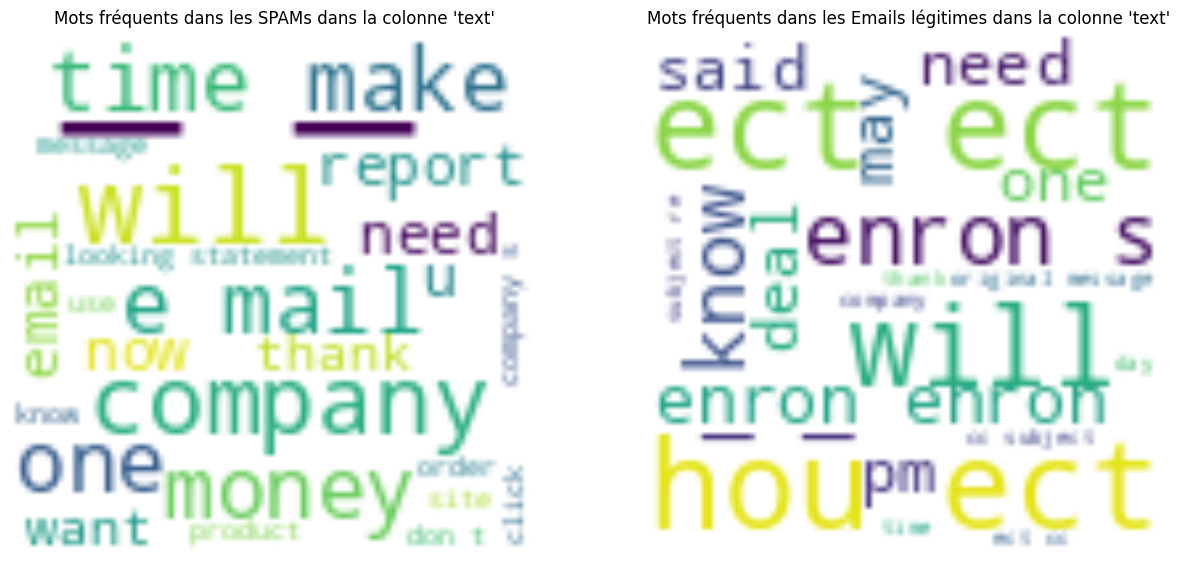

Longueur spam_text et ham_text: 628176 500752


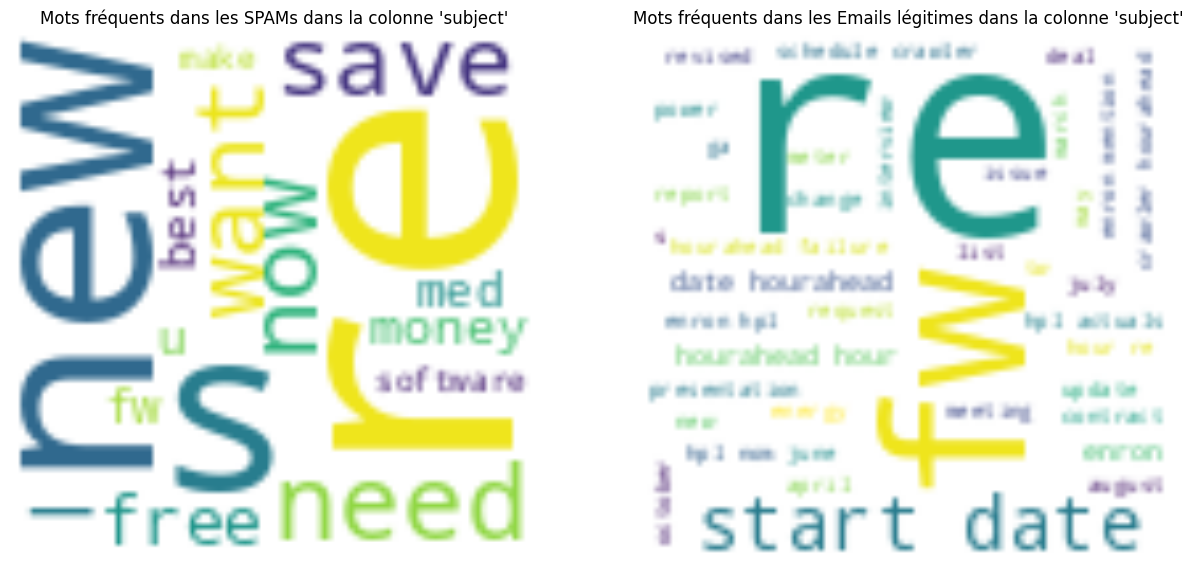

Longueur spam_text et ham_text: 20635635 26076123


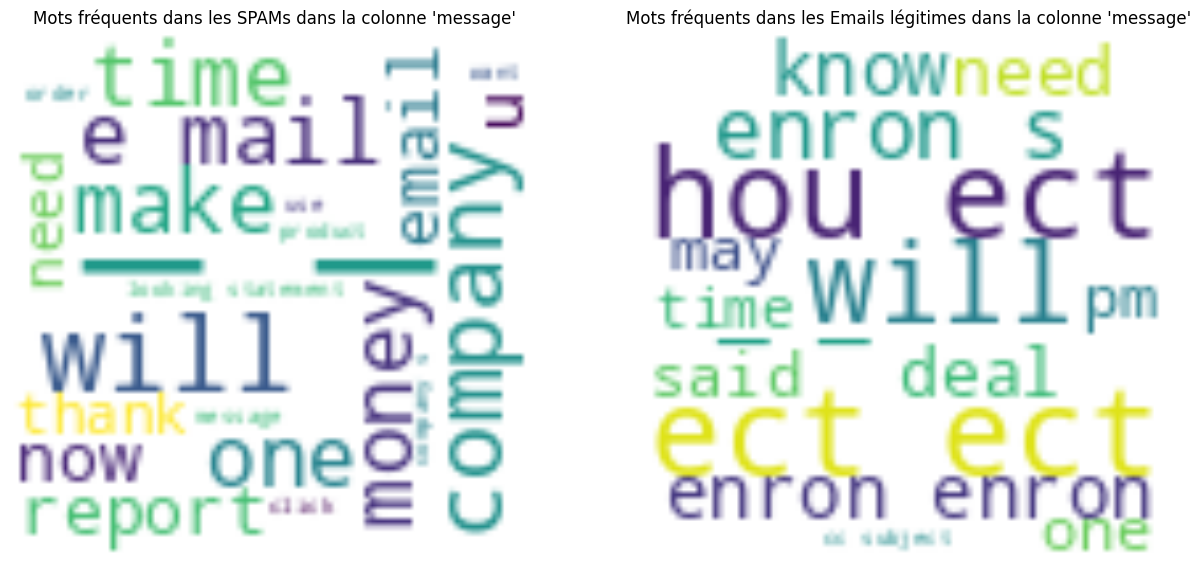

In [11]:
from wordcloud import WordCloud

for i in ['text', 'subject', 'message']:
    
    spam_text = " ".join(data[data["label_text"] == 'spam'][i].dropna().astype(str))
    ham_text = " ".join(data[data["label_text"] == 'ham'][i].dropna().astype(str))
    print("Longueur spam_text et ham_text:", len(spam_text), len(ham_text))
    
    spam_wordcloud = WordCloud(width=100, height=100, background_color="white").generate(spam_text)
    ham_wordcloud = WordCloud(width=100, height=100, background_color="white").generate(ham_text)
    
    fig, axes = plt.subplots(1, 2, figsize=(15,7))
    
    axes[0].imshow(spam_wordcloud, interpolation='bilinear')
    axes[0].set_title(f"Mots fréquents dans les SPAMs dans la colonne '{i}'")
    axes[0].axis("off")
    
    axes[1].imshow(ham_wordcloud, interpolation='bilinear')
    axes[1].set_title(f"Mots fréquents dans les Emails légitimes dans la colonne '{i}'")
    axes[1].axis("off")
    
    plt.show()

# 2. Prétraitement du texte

### 2.a Convertir tout le texte en minuscules : text.lower()

In [12]:
data["text"].dropna().astype(str).str.lower()
data.head()

,text,label,label_text,subject,message,date
0,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


### 2.b Suppression des doublons

In [13]:
if data.duplicated().sum() > 0:
    data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [14]:
data.shape

(29089, 6)

### 2.c Identifions les valeurs manquantes et supprimer les lignes où la colonne text est vide ou manquante.

- Identification

In [15]:
data[data["text"].isnull()]

,text,label,label_text,subject,message,date
218,NaN,1,spam,NaN,NaN,2004-11-30
565,NaN,1,spam,NaN,NaN,2005-01-14
989,NaN,1,spam,NaN,NaN,2004-12-13
1716,NaN,1,spam,NaN,NaN,2004-08-13
3474,NaN,1,spam,NaN,NaN,2004-05-04
3743,NaN,1,spam,NaN,NaN,2005-02-07
5331,NaN,1,spam,NaN,NaN,2004-12-29
5997,NaN,1,spam,NaN,NaN,2004-06-10
6734,NaN,1,spam,NaN,NaN,2004-12-21
6963,NaN,1,spam,NaN,NaN,2004-12-20


In [16]:
data["text"].isnull().sum()

np.int64(43)

- Suppression

In [17]:
print(data["text"].isnull().sum() > 0)
if data["text"].isnull().sum() > 0:
    data.dropna(subset="text", inplace=True)
data['text'].isnull().sum()
data['text'].head()

True


0    any software just for 15 $ - 99 $ understandin...
1    perspective on ferc regulatory action client c...
2    wanted to try ci 4 lis but thought it was way ...
3    enron / hpl actuals for december 11 , 2000 tec...
4    looking for cheap high - quality software ? ro...
Name: text, dtype: object

### 2.d Appliquons la tokenisation : nltk.word_tokenize(text)

In [18]:
pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk 
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/meissagningue/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
from nltk import word_tokenize

tokens = []
for i in data.index:
    text = data.loc[i, "text"]
    tokens.append(word_tokenize(text))
data['text_tokens'] = tokens


In [21]:
data

,text,label,label_text,subject,message,date,text_tokens
0,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18,"[any, software, just, for, 15, $, -, 99, $, un..."
1,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19,"[perspective, on, ferc, regulatory, action, cl..."
2,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11,"[wanted, to, try, ci, 4, lis, but, thought, it..."
3,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12,"[enron, /, hpl, actuals, for, december, 11, ,,..."
4,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13,"[looking, for, cheap, high, -, quality, softwa..."
...,...,...,...,...,...,...,...
31710,"re : var meetings in houston shirley ,\ndo you...",0,ham,re : var meetings in houston,"shirley ,\ndo you think we can get another roo...",2001-04-19,"[re, :, var, meetings, in, houston, shirley, ,..."
31711,"credit netco start up plan louise ,\nattached ...",0,ham,credit netco start up plan,"louise ,\nattached is the electronic version o...",2002-01-07,"[credit, netco, start, up, plan, louise, ,, at..."
31712,"everything you are looking for hello , visit o...",1,spam,everything you are looking for,"hello , visit our amazing\nonline shop !\nnows...",2005-03-26,"[everything, you, are, looking, for, hello, ,,..."
31713,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,0,ham,start date : 2 / 5 / 02 ; hourahead hour : 18 ;,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,2002-02-05,"[start, date, :, 2, /, 5, /, 02, ;, hourahead,..."


### 2.c Suppression les stopwords avec nltk.corpus.stopwords.words('english')

In [22]:
#from nltk import stopwords
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words
cleaned_tokens = []
for tokens in data['text']:
    cleaned = [word for word in tokens if word.lower() not in stop_words]
    cleaned_tokens.append(cleaned)

data['text_stopwords'] = cleaned_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/meissagningue/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meissagningue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.d Supprission des ponctuations et les caractères spéciaux à l’aide de re.sub() ou string.punctuation.

In [23]:
#data["text"] = data["text"].apply(lambda x: x.replace(" ", ""))
print(data["text"].iloc[0])          # affiche le premier texte brut
print(list(data["text"].iloc[0]))    # affiche caractère par caractère pour voir


any software just for 15 $ - 99 $ understanding oem software
lead me not into temptation ; i can find the way myself .
# 3533 . the law disregards trifles .
['a', 'n', 'y', ' ', 's', 'o', 'f', 't', 'w', 'a', 'r', 'e', ' ', 'j', 'u', 's', 't', ' ', 'f', 'o', 'r', ' ', '1', '5', ' ', '$', ' ', '-', ' ', '9', '9', ' ', '$', ' ', 'u', 'n', 'd', 'e', 'r', 's', 't', 'a', 'n', 'd', 'i', 'n', 'g', ' ', 'o', 'e', 'm', ' ', 's', 'o', 'f', 't', 'w', 'a', 'r', 'e', '\n', 'l', 'e', 'a', 'd', ' ', 'm', 'e', ' ', 'n', 'o', 't', ' ', 'i', 'n', 't', 'o', ' ', 't', 'e', 'm', 'p', 't', 'a', 't', 'i', 'o', 'n', ' ', ';', ' ', 'i', ' ', 'c', 'a', 'n', ' ', 'f', 'i', 'n', 'd', ' ', 't', 'h', 'e', ' ', 'w', 'a', 'y', ' ', 'm', 'y', 's', 'e', 'l', 'f', ' ', '.', '\n', '#', ' ', '3', '5', '3', '3', ' ', '.', ' ', 't', 'h', 'e', ' ', 'l', 'a', 'w', ' ', 'd', 'i', 's', 'r', 'e', 'g', 'a', 'r', 'd', 's', ' ', 't', 'r', 'i', 'f', 'l', 'e', 's', ' ', '.']


In [24]:
import string
import re
#data["text"] = data["text"].apply(lambda x: " ".join([i for i in x if i.isalnum()]))
#data["text"] = data["text"].apply(lambda txt: "".join([ch for ch in txt if ch not in string.punctuation]))
data["text_clean"] = data["text"].apply(lambda x: re.sub(r'^[a-zA-A0-9\s]', "", x))
#data["text"] = data["text_clean"].apply(lambda x: x.strip())

#data["text"] = data["text"].apply(lambda x: word_tokenize(x))
data["text"].head()

0    any software just for 15 $ - 99 $ understandin...
1    perspective on ferc regulatory action client c...
2    wanted to try ci 4 lis but thought it was way ...
3    enron / hpl actuals for december 11 , 2000 tec...
4    looking for cheap high - quality software ? ro...
Name: text, dtype: object

# 3. Extraction des caractéristiques

### 3.a Vectoriser le texte à l’aide de TfidfVectorizer() ou CountVectorizer()

In [25]:
pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
print("Exemples de textes après nettoyage :")
print(data["text"].head(10))

Exemples de textes après nettoyage :
0    any software just for 15 $ - 99 $ understandin...
1    perspective on ferc regulatory action client c...
2    wanted to try ci 4 lis but thought it was way ...
3    enron / hpl actuals for december 11 , 2000 tec...
4    looking for cheap high - quality software ? ro...
5    emerging growth stock profile vera ,\nvcsc - b...
6    internet provider abuse i noticed that you hav...
7    [ avfs ] romanian software production & export...
8    fortune most admired ranking congratulations !...
9    localized software , all languages available ....
Name: text, dtype: object


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#data["text"] = data["text"].apply(lambda x: " ".join(x))
#Définir X à partir des variables sélectionnées.
print(data['text'].head(6))
X = vectorizer.fit_transform(data["text"])
print("Taille du vocabulaire :", len(vectorizer.vocabulary_))
print("Matrice de features :\n", X.toarray())
print("Noms des features :", vectorizer.get_feature_names_out())

0    any software just for 15 $ - 99 $ understandin...
1    perspective on ferc regulatory action client c...
2    wanted to try ci 4 lis but thought it was way ...
3    enron / hpl actuals for december 11 , 2000 tec...
4    looking for cheap high - quality software ? ro...
5    emerging growth stock profile vera ,\nvcsc - b...
Name: text, dtype: object
Taille du vocabulaire : 153383
Matrice de features :
 [[0 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Noms des features : ['00' '000' '0000' ... 'þô' 'þöyledir' 'þù']


### 3.c Diviser les données en ensemble d’entraînement et de test à l’aide de train_test_split.

In [28]:
from sklearn.model_selection import train_test_split

y=data["label_text"]
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entraînement de plusieurs modèles de classification

### 4.a Decision Tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 42) 

dtc.fit(X_train, y_train)
#dtc.score(X_test, y_test)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.b NaÏve Bayes Classifier

In [30]:
from sklearn.naive_bayes import MultinomialNB

nbc = MultinomialNB()
nbc.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### 4.c Support Vector Class

In [31]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svc = LinearSVC(max_iter=5000, random_state=42)

svc.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


# 5. Évaluation des modèles

### 5.a Matrice de confusion

- Utils

In [32]:
results = []
models = {
    "Decision Tree Classifier":dtc,
    "Naive Bayes Classifier":nbc,
    "Support Vector Class":svc
}

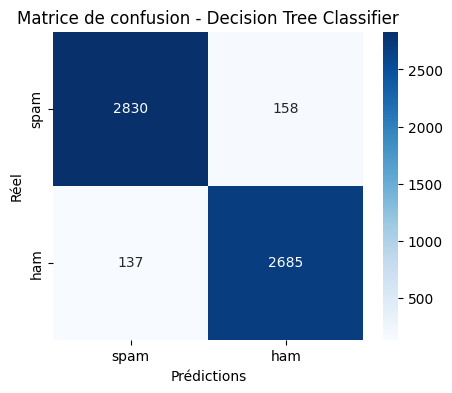

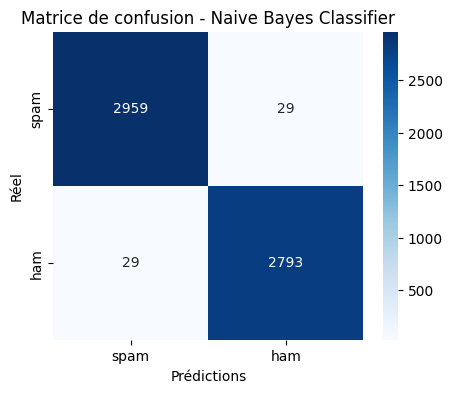

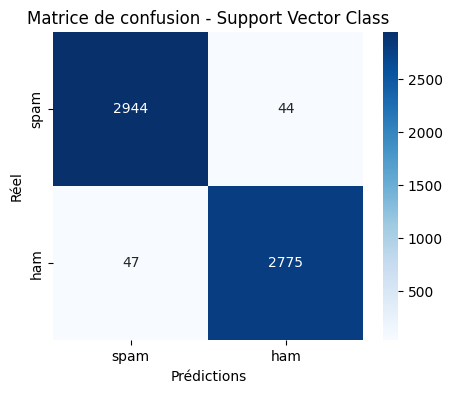

In [33]:
from sklearn.metrics import confusion_matrix

def evaluation_with_confusion_matrix():
    for name, model in models.items():
        results.append({
            "Models": name,
            "confusion_matrix":confusion_matrix(y_test, model.predict(X_test))
        })
        cm = confusion_matrix(y_test, model.predict(X_test))
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=set(y_test), 
                    yticklabels=set(y_test))
        plt.title(f"Matrice de confusion - {name}")
        plt.xlabel("Prédictions")
        plt.ylabel("Réel")
        plt.show()
            
evaluation_with_confusion_matrix()

### 5.b Précision

In [34]:
from sklearn.metrics import precision_score

def evaluation_with_precision_score():
    for name, model in models.items():
        results.append({
            "Models": name,
            "precision score": precision_score(y_test, model.predict(X_test), average="weighted")
        })
            
evaluation_with_precision_score()

### 5.c Recall

In [35]:
from sklearn.metrics import recall_score

def evaluation_with_recall_score():
    for name, model in models.items():
        results.append({
            "Models": name,
            "recall score": recall_score(y_test, model.predict(X_test), average="weighted")
        })   
evaluation_with_recall_score()

### 5.d F1_score

In [36]:
from sklearn.metrics import f1_score

def evaluation_with_f1_score():
    for name, model in models.items():
        results.append({
            "Models": name,
            "f1_score": f1_score(y_test, model.predict(X_test), average="weighted")
        })
            
evaluation_with_f1_score()

### 5.e Tableau comparatif

In [37]:
result_score = pd.DataFrame(results)
result_score.sort_values(by="f1_score", ascending=False)

,Models,confusion_matrix,precision score,recall score,f1_score
10,Naive Bayes Classifier,NaN,NaN,NaN,0.990017
11,Support Vector Class,NaN,NaN,NaN,0.984337
9,Decision Tree Classifier,NaN,NaN,NaN,0.949230
0,Decision Tree Classifier,"[[2830, 158], [137, 2685]]",NaN,NaN,NaN
1,Naive Bayes Classifier,"[[2959, 29], [29, 2793]]",NaN,NaN,NaN
2,Support Vector Class,"[[2944, 44], [47, 2775]]",NaN,NaN,NaN
3,Decision Tree Classifier,NaN,0.949259,NaN,NaN
4,Naive Bayes Classifier,NaN,0.990017,NaN,NaN
5,Support Vector Class,NaN,0.984337,NaN,NaN
6,Decision Tree Classifier,NaN,NaN,0.949225,NaN


# 6. Validation Croisée

In [38]:
from sklearn.model_selection import cross_val_score
val_score = []
for name, model in models.items():
    for i in ['precision_weighted', 'recall_weighted', 'f1_weighted']:
        score = cross_val_score(model, X_train, y_train, cv=3, scoring=i, n_jobs=-1).mean()
        val_score.append({
            "Model":name,
            "Metric":i,
            "Moyenne Score": score,
            "Ecart-type score": np.std(score)
        })
val_score = pd.DataFrame(val_score)
val_score.sort_values(by="Metric", ascending=False)


/Users/meissagningue/Projects/dev_ia/project_BMSecurity/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/project_BMSecurity/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/project_BMSecurity/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model,Metric,Moyenne Score,Ecart-type score
1,Decision Tree Classifier,recall_weighted,0.946290,0.0
4,Naive Bayes Classifier,recall_weighted,0.988036,0.0
7,Support Vector Class,recall_weighted,0.980590,0.0
0,Decision Tree Classifier,precision_weighted,0.946438,0.0
3,Naive Bayes Classifier,precision_weighted,0.988040,0.0
6,Support Vector Class,precision_weighted,0.980620,0.0
2,Decision Tree Classifier,f1_weighted,0.946301,0.0
5,Naive Bayes Classifier,f1_weighted,0.988036,0.0
8,Support Vector Class,f1_weighted,0.980593,0.0


# 7. Optimisation des hyperparamètres

### 7.a GridSearchCV

In [39]:
models

{'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
 'Naive Bayes Classifier': MultinomialNB(),
 'Support Vector Class': LinearSVC(max_iter=5000, random_state=42)}

In [40]:
from sklearn.model_selection import GridSearchCV


grid = []
for name, model in models.items():
    if name == "Decision Tree Classifier":
        param_grid = {
            "criterion": ["gini", "entropy", "log_loss"],
            "splitter": ["best", "random"],
            "max_depth": [None, 10, 20, 50]
        }
        grid_dtc = GridSearchCV(model, param_grid, cv=3,
                               scoring="f1_weighted", n_jobs=-1, verbose=1)
        grid_dtc.fit(X_train, y_train)
        
        print(f"Meilleurs hyperparamètres pour {name} :", grid_dtc.best_params_)
        
        grid.append({
            "Modele": name,
            "F1_score": grid_dtc.best_score_
        })
        
    elif name == "Naive Bayes Classifier":
        param_grid = {
            "alpha": np.linspace(0.1, 1.5, 10)
        }
        grid_nbc = GridSearchCV(model, param_grid, cv=3,
                               scoring="f1_weighted", n_jobs=-1, verbose=1)
        grid_nbc.fit(X_train, y_train)
        
        print(f"Meilleurs hyperparamètres pour {name} :", grid_nbc.best_params_)
        
        grid.append({
            "Modele": name,
            "F1_score": grid_nbc.best_score_
        })
        
    elif name == "Support Vector Class":
        param_grid = {
            "penalty": ["l2"],  
            "loss": ["hinge", "squared_hinge"],
            "C": [0.1, 1, 10],
            "max_iter": [5000, 10000]
        }
        
        grid_svc = GridSearchCV(model, param_grid, cv=3,
                               scoring="f1_weighted", n_jobs=-1, verbose=1)
        grid_svc.fit(X_train, y_train)
        
        print(f"Meilleurs hyperparamètres pour {name} :", grid_svc.best_params_)
        
        grid.append({
            "Modele": name,
            "F1_score": grid_svc.best_score_
        })

results_df = pd.DataFrame(grid)
results_df = results_df.sort_values(by="F1_score", ascending=False)
results_df

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Meilleurs hyperparamètres pour Decision Tree Classifier : {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs hyperparamètres pour Naive Bayes Classifier : {'alpha': np.float64(0.1)}
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/meissagningue/Projects/dev_ia/project_BMSecurity/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/project_BMSecurity/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Meilleurs hyperparamètres pour Support Vector Class : {'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 5000, 'penalty': 'l2'}


,Modele,F1_score
1,Naive Bayes Classifier,0.988769
2,Support Vector Class,0.983734
0,Decision Tree Classifier,0.946301


# 8. Sélection et sauvegarde du meilleur modèle

In [41]:
import joblib
from sklearn.pipeline import Pipeline

def build_pipeline(model):    
    # Créer un pipeline avec le vectorizer et ce best_model
    pipeline = Pipeline([
        ('vectorizer', CountVectorizer(max_features=5000)),
        ('clf', model)
    ])
    
    # Entraîner
    pipeline.fit(data["text"], data["label_text"])
    
    # Sauvegarder
    joblib.dump(pipeline, "../models/pipeline_vect_model.pkl")


best_model_name = results_df.iloc[0]["Modele"]
if best_model_name == "Decision Tree Classifier":
    best_model = grid_dtc.best_estimator_
    print(f"Model {best_model_name} séléctionné")
elif best_model_name == "Support Vector Class":
    best_model = grid_svc.best_estimator_
    print(f"Model {best_model_name} séléctionné")
else:
    best_model = grid_nbc.best_estimator_
    print(f"Model {best_model_name} séléctionné")

pipeline = build_pipeline(best_model)

print("Pipeline modele et vectorizer sauvegardé avec succés")


Model Naive Bayes Classifier séléctionné
Pipeline modele et vectorizer sauvegardé avec succés
